## Importação das Bibliotecas

Neste trabalho foram utilizadas as seguintes bibliotecas:
- __numpy__: biblioteca para lidar com operações matemáticas;
- __pandas__: para leitura e tratamento de dados tabulares;
- __seaborn__ e __matplotlib__: para visualização e gráficos;
- __scikit-learn__: para métrica de acurácia;

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## Carregando dataset

O primeiro passo foi carregar os dados e atribuir um valor numérico para cada classe

In [2]:
df = pd.read_csv('dogs_cats.csv', index_col=0)

In [3]:
df['classe'] = df['classe'].replace('cachorro', 0) 
df['classe'] = df['classe'].replace('gato', 1)
df

,comprimento,peso,classe
0,45.231415,431.548671,0
1,38.003753,517.870914,1
2,53.608592,444.025762,0
3,39.315731,524.066579,1
4,45.581301,450.552000,0
...,...,...,...
1995,37.590457,587.274926,1
1996,43.818870,416.846089,0
1997,36.876470,483.215531,1
1998,49.415613,514.637485,0


## Visualização dos dados

Com os dados carregados é possível enxergar a dispersão dos mesmos. Analisando o gráfico é possível notar que não existe uma entropia tão alta (as classes estão concentradas em regiões específicas), contudo também o problema não parece ser linearmente separável em sua totalidade à primeira vista.

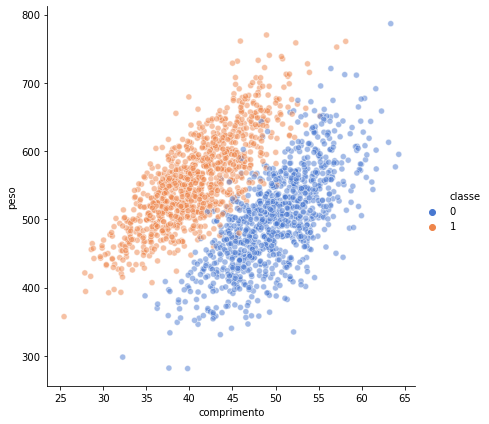

In [4]:
sns.relplot(x="comprimento", y="peso", hue="classe",
            alpha=.5, palette="muted",
            height=6, data=df)

## Definição do Perceptron

Para esse trabalho foi utilizado um perceptron como classificador linear com a utilização da função ReLU.

In [5]:
def relu(x):
    return np.maximum(0,x)

In [6]:
def perceptron(X, weights):
    o = np.dot(X, weights[1:]) + weights[0]
    o = relu(o)
    y = 1 if o > 0.0 else 0
    return y

O classificador foi setado com 100 iterações e taxa de aprendizado igual à 0,003. Além disso a atualização de erros foi feita de maneira estocástica. Esses parâmetros foram sendo testados de maneira aleatória manualmente até atingirem a melhor acurácia.

In [7]:
def train(X, y, weights):
    epochs = 100
    neta = 0.003
    error = []
    for _ in range(epochs):
        errors = 0
        for xi, target in zip(X, y):
            update = neta * (target - perceptron(xi, weights))
            weights[1:] += update * xi
            weights[0] += update
            errors += int(update != 0.0)
        error.append(errors)
    return weights

In [8]:
def predict(X, weights):
    preds = []
    for xi in X:
        preds.append(perceptron(xi, weights))
    return preds

## Aplicação do Classificador

In [9]:
X = df[['comprimento','peso']]
y = df[['classe']]
weights = np.zeros(1 + X.shape[1])
errors = []

In [ ]:
weights = train(X.values, y.values, weights)

Os pesos finais encontrados para o classificador modela do foram os exibidos abaixo:

In [10]:
weights

array([   1.713     , -147.42574861,   12.44074678])

In [11]:
preds = predict(X.values, weights)

A __acurácia__ final atingida foi de 96,2%

In [12]:
accuracy_score(preds, y.values)

0.962